In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Model 1

Membangun arsitektur model untuk 3 kelas...
Memuat bobot dari: /content/drive/MyDrive/Kuning Telur - CV/05 Model/ModelCNN_3/final_type_model.h5
Model siap digunakan.

Silakan unggah gambar kuning telur (ayam petelur, bebek, atau puyuh)...


Saving kamera_440_480_lx_14_00_2_telur_bebek_2.png to kamera_440_480_lx_14_00_2_telur_bebek_2.png
Saving kamera_440_480_lx_14_00_1_telur_ayam_petelur_3.png to kamera_440_480_lx_14_00_1_telur_ayam_petelur_3.png
Saving kamera_440_480_lx_15_00_1_telur_ayam_petelur_1.png to kamera_440_480_lx_15_00_1_telur_ayam_petelur_1.png
Saving kamera_440_480_lx_13_00_3_telur_puyuh_3.png to kamera_440_480_lx_13_00_3_telur_puyuh_3.png
Saving kamera_440_480_lx_13_00_2_telur_bebek_2.png to kamera_440_480_lx_13_00_2_telur_bebek_2.png
Saving kamera_440_480_lx_15_00_2_telur_bebek_1.png to kamera_440_480_lx_15_00_2_telur_bebek_1.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 866ms/step

--- Hasil Prediksi ---
Gambar: kamera_440_480_lx_14_00_2_telur_bebek_2.png
Prediksi: bebek (Keyakinan: 76.63%)


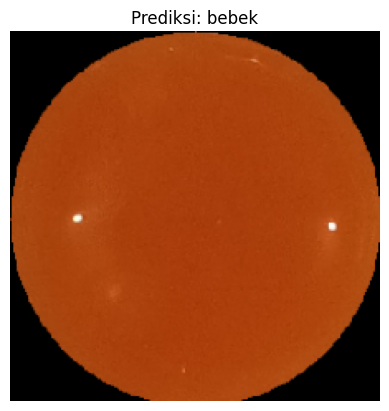

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

--- Hasil Prediksi ---
Gambar: kamera_440_480_lx_14_00_1_telur_ayam_petelur_3.png
Prediksi: ayampetelur (Keyakinan: 82.46%)


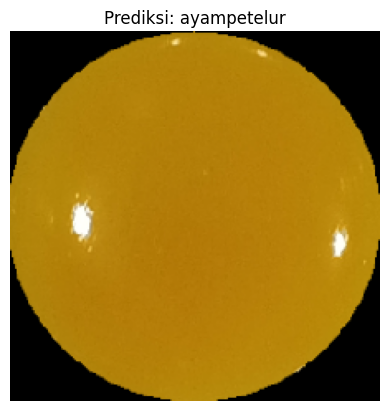

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

--- Hasil Prediksi ---
Gambar: kamera_440_480_lx_15_00_1_telur_ayam_petelur_1.png
Prediksi: ayampetelur (Keyakinan: 88.73%)


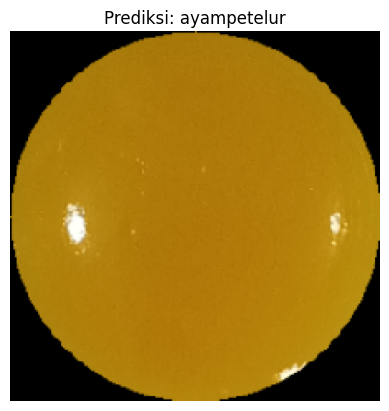

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

--- Hasil Prediksi ---
Gambar: kamera_440_480_lx_13_00_3_telur_puyuh_3.png
Prediksi: puyuh (Keyakinan: 94.98%)


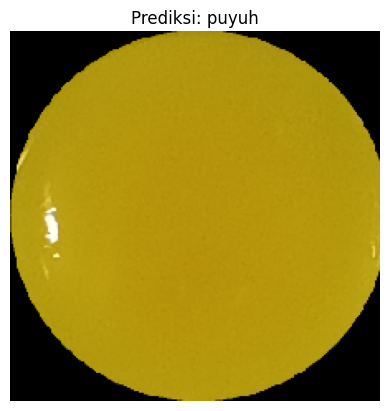

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

--- Hasil Prediksi ---
Gambar: kamera_440_480_lx_13_00_2_telur_bebek_2.png
Prediksi: bebek (Keyakinan: 73.81%)


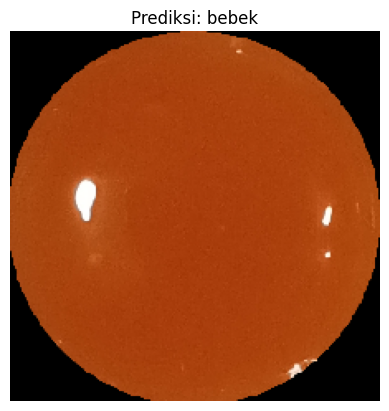

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

--- Hasil Prediksi ---
Gambar: kamera_440_480_lx_15_00_2_telur_bebek_1.png
Prediksi: bebek (Keyakinan: 74.78%)


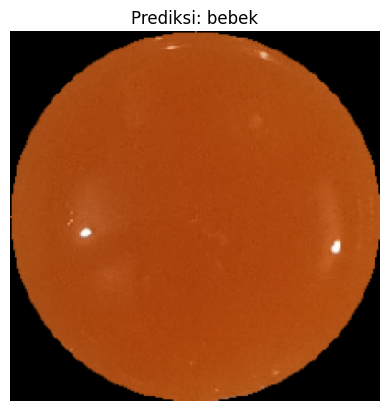

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from google.colab import files
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

# ----- Konfigurasi Model (Disesuaikan untuk Model 1) -----
IMG_SIZE = (224, 224)
NUM_CLASSES = 3 # Model pertama Anda memiliki 3 kelas
MODEL_PATH = '/content/drive/MyDrive/Kuning Telur - CV/05 Model/ModelCNN_3/final_type_model.h5'

# ----- 1. DEFINISIKAN LABEL MAP UNTUK 3 KELAS -----
LABEL_MAP = {
    "ayampetelur": 0,
    "bebek": 1,
    "puyuh": 2
}
# Buat inverse map untuk menerjemahkan hasil prediksi
inv_label_map = {v: k for k, v in LABEL_MAP.items()}


# ----- Fungsi untuk membangun arsitektur model (Harus sama persis dengan training) -----
def get_augmentation():
    """Fungsi augmentasi data, sama seperti saat training."""
    return tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.04),
        layers.RandomZoom(0.05),
        layers.RandomTranslation(0.02, 0.02),
        layers.RandomContrast(0.08),
    ], name="augmentation")

def build_model(num_classes):
    """Membangun arsitektur model MobileNetV2, sama seperti saat training."""
    base = tf.keras.applications.MobileNetV2(
        input_shape=(*IMG_SIZE, 3),
        include_top=False,
        weights='imagenet'
    )
    base.trainable = False
    inputs = layers.Input(shape=(*IMG_SIZE, 3))
    x = get_augmentation()(inputs)
    # Model ini dilatih dengan preprocess_input di dalamnya, jadi kita biarkan di sini
    x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
    x = base(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)
    return model

# ----- Membangun ulang model dan memuat bobotnya -----
print("Membangun arsitektur model untuk 3 kelas...")
model = build_model(NUM_CLASSES)
print("Memuat bobot dari:", MODEL_PATH)
try:
    model.load_weights(MODEL_PATH)
    print("Model siap digunakan.")
except Exception as e:
    print(f"Gagal memuat bobot model: {e}")
    print("Pastikan path model sudah benar dan file tidak korup.")
    model = None

# ----- Fungsi untuk prediksi (hanya berjalan jika model berhasil dimuat)-----
if model:
    def predict_image(img_path):
        # Memuat dan memproses gambar
        img = image.load_img(img_path, target_size=IMG_SIZE)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) # Buat batch

        # Melakukan prediksi
        predictions = model.predict(img_array)
        score = np.max(predictions)
        pred_class_index = np.argmax(predictions, axis=1)[0]

        # Mengubah hasil prediksi (angka) menjadi nama label (teks)
        label_name = inv_label_map[pred_class_index]

        # Menampilkan hasil
        print(f"\n--- Hasil Prediksi ---")
        print(f"Gambar: {os.path.basename(img_path)}")
        print(f"Prediksi: {label_name} (Keyakinan: {score:.2%})")

        plt.imshow(img)
        plt.title(f"Prediksi: {label_name}")
        plt.axis('off')
        plt.show()

    # ----- Upload gambar dari komputer -----
    print("\nSilakan unggah gambar kuning telur (ayam petelur, bebek, atau puyuh)...")
    uploaded = files.upload()
    for filename in uploaded.keys():
        predict_image(filename)

# Model 2

Membangun arsitektur model...
Memuat bobot dari: /content/drive/MyDrive/Kuning Telur - CV/05 Model/ModelCNN_6/final_type_condition_model.h5
Model siap digunakan.

Silakan unggah gambar kuning telur...


Saving kamera_440_480_lx_14_00_2_telur_bebek_2.png to kamera_440_480_lx_14_00_2_telur_bebek_2 (1).png
Saving kamera_440_480_lx_14_00_1_telur_ayam_petelur_3.png to kamera_440_480_lx_14_00_1_telur_ayam_petelur_3 (1).png
Saving kamera_440_480_lx_15_00_1_telur_ayam_petelur_1.png to kamera_440_480_lx_15_00_1_telur_ayam_petelur_1 (1).png
Saving kamera_440_480_lx_13_00_3_telur_puyuh_3.png to kamera_440_480_lx_13_00_3_telur_puyuh_3 (1).png
Saving kamera_440_480_lx_13_00_2_telur_bebek_2.png to kamera_440_480_lx_13_00_2_telur_bebek_2 (1).png
Saving kamera_440_480_lx_15_00_2_telur_bebek_1.png to kamera_440_480_lx_15_00_2_telur_bebek_1 (1).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step

--- Hasil Prediksi ---
Gambar: kamera_440_480_lx_14_00_2_telur_bebek_2 (1).png
Prediksi: bebek_Tidak_Segar (Keyakinan: 46.68%)


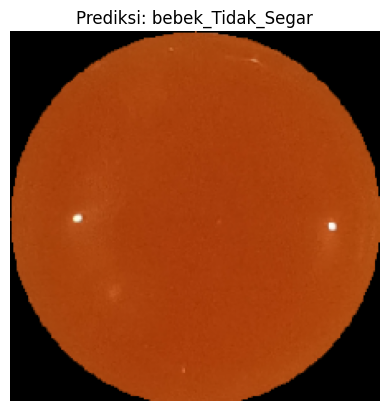

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

--- Hasil Prediksi ---
Gambar: kamera_440_480_lx_14_00_1_telur_ayam_petelur_3 (1).png
Prediksi: ayampetelur_Tidak_Segar (Keyakinan: 82.14%)


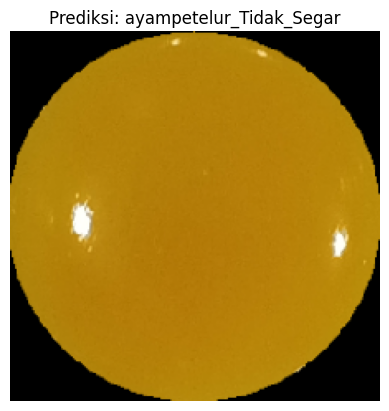

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step

--- Hasil Prediksi ---
Gambar: kamera_440_480_lx_15_00_1_telur_ayam_petelur_1 (1).png
Prediksi: ayampetelur_Tidak_Segar (Keyakinan: 97.85%)


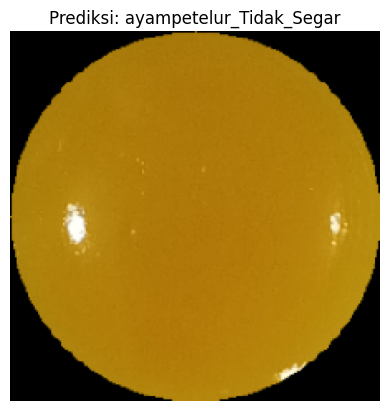

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

--- Hasil Prediksi ---
Gambar: kamera_440_480_lx_13_00_3_telur_puyuh_3 (1).png
Prediksi: puyuh_Segar (Keyakinan: 93.73%)


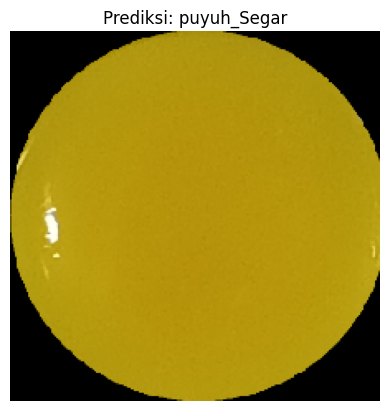

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

--- Hasil Prediksi ---
Gambar: kamera_440_480_lx_13_00_2_telur_bebek_2 (1).png
Prediksi: bebek_Segar (Keyakinan: 84.59%)


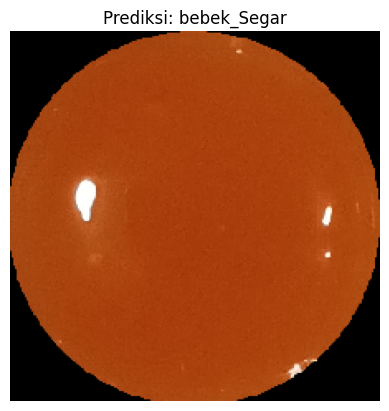

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step

--- Hasil Prediksi ---
Gambar: kamera_440_480_lx_15_00_2_telur_bebek_1 (1).png
Prediksi: bebek_Tidak_Segar (Keyakinan: 84.45%)


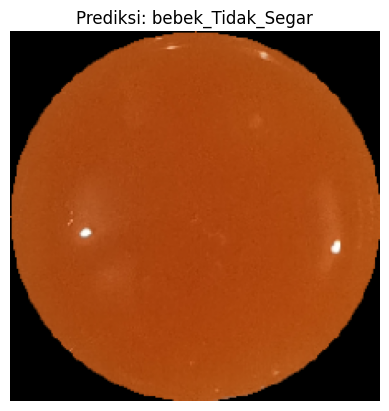

In [ ]:
import tensorflow as tf
import os
from tensorflow.keras import layers
from google.colab import files
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# ----- Konfigurasi Model (Harus sama dengan saat training) -----
IMG_SIZE = (224, 224)
NUM_CLASSES = 6 # Sesuaikan dengan jumlah kelas 'Label_Final' Anda
MODEL_PATH = '/content/drive/MyDrive/Kuning Telur - CV/05 Model/ModelCNN_6/final_type_condition_model.h5'

# ----- 1. DEFINISIKAN LABEL MAP (PENTING) -----
# Salin `LABEL_MAP` yang dihasilkan dari output skrip training Anda.
# Contoh: {'ayampetelur_Segar': 0, 'ayampetelur_Tidak_Segar': 1, ...}
LABEL_MAP = {
    'ayampetelur_Segar': 0,
    'ayampetelur_Tidak_Segar': 1,
    'bebek_Segar': 2,
    'bebek_Tidak_Segar': 3,
    'puyuh_Segar': 4,
    'puyuh_Tidak_Segar': 5
}
# Buat inverse map untuk menerjemahkan hasil prediksi
inv_label_map = {v: k for k, v in LABEL_MAP.items()}


# ----- Fungsi untuk membangun arsitektur model (Harus sama persis dengan training) -----
def get_augmentation():
    return tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.04),
        layers.RandomZoom(0.05),
        layers.RandomTranslation(0.02, 0.02),
        layers.RandomContrast(0.08),
    ], name="augmentation")

def build_model(num_classes):
    base = tf.keras.applications.MobileNetV2(
        input_shape=(*IMG_SIZE, 3),
        include_top=False,
        weights='imagenet'
    )
    base.trainable = False
    inputs = layers.Input(shape=(*IMG_SIZE, 3))
    x = get_augmentation()(inputs)
    x = tf.keras.applications.mobilenet_v2.preprocess_input(x) # Biarkan ini karena model dilatih dengan cara ini
    x = base(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)
    return model

# ----- Membangun ulang model dan memuat bobotnya -----
print("Membangun arsitektur model...")
model = build_model(NUM_CLASSES)
print("Memuat bobot dari:", MODEL_PATH)
model.load_weights(MODEL_PATH)
print("Model siap digunakan.")


# ----- Fungsi untuk prediksi -----
def predict_image(img_path):
    # ----- Proses gambar -----
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) # Buat menjadi batch berisi 1 gambar

    # ----- 2. HAPUS PREPROCESSING MANUAL -----
    # Baris ini dihapus karena model sudah melakukannya secara internal.
    # img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

    # ----- Prediksi -----
    predictions = model.predict(img_array)
    score = np.max(predictions)
    pred_class_index = np.argmax(predictions, axis=1)[0]

    # ----- Mapping ke label -----
    label_name = inv_label_map[pred_class_index]

    # Tampilkan hasil
    print(f"\n--- Hasil Prediksi ---")
    print(f"Gambar: {os.path.basename(img_path)}")
    print(f"Prediksi: {label_name} (Keyakinan: {score:.2%})")

    plt.imshow(img)
    plt.title(f"Prediksi: {label_name}")
    plt.axis('off')
    plt.show()

# ----- Upload gambar dari komputer -----
print("\nSilakan unggah gambar kuning telur...")
uploaded = files.upload()
for filename in uploaded.keys():
    predict_image(filename)

# Model 3

Membangun arsitektur model...
Memuat bobot dari: /content/drive/MyDrive/Kuning Telur - CV/05 Model/ModelCNN_9/final_type_condition_model.h5
Model siap digunakan.

Silakan unggah gambar kuning telur...


Saving kamera_440_480_lx_14_00_2_telur_bebek_2.png to kamera_440_480_lx_14_00_2_telur_bebek_2 (2).png
Saving kamera_440_480_lx_14_00_1_telur_ayam_petelur_3.png to kamera_440_480_lx_14_00_1_telur_ayam_petelur_3 (2).png
Saving kamera_440_480_lx_15_00_1_telur_ayam_petelur_1.png to kamera_440_480_lx_15_00_1_telur_ayam_petelur_1 (2).png
Saving kamera_440_480_lx_13_00_3_telur_puyuh_3.png to kamera_440_480_lx_13_00_3_telur_puyuh_3 (2).png
Saving kamera_440_480_lx_13_00_2_telur_bebek_2.png to kamera_440_480_lx_13_00_2_telur_bebek_2 (2).png
Saving kamera_440_480_lx_15_00_2_telur_bebek_1.png to kamera_440_480_lx_15_00_2_telur_bebek_1 (2).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step

--- Hasil Prediksi ---
Gambar: kamera_440_480_lx_14_00_2_telur_bebek_2 (2).png
Prediksi: bebek_Kurang_Segar (Keyakinan: 69.81%)


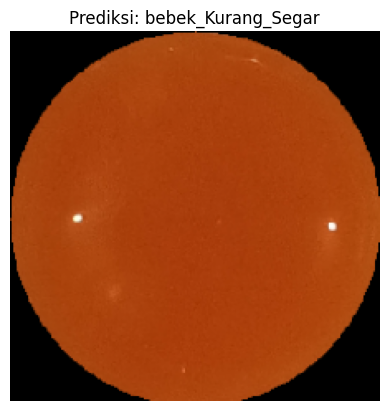

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

--- Hasil Prediksi ---
Gambar: kamera_440_480_lx_14_00_1_telur_ayam_petelur_3 (2).png
Prediksi: ayampetelur_Kurang_Segar (Keyakinan: 47.91%)


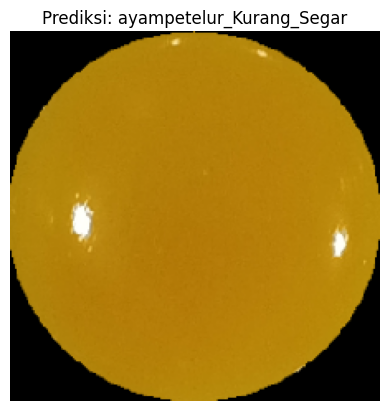

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

--- Hasil Prediksi ---
Gambar: kamera_440_480_lx_15_00_1_telur_ayam_petelur_1 (2).png
Prediksi: ayampetelur_Tidak_Segar (Keyakinan: 88.84%)


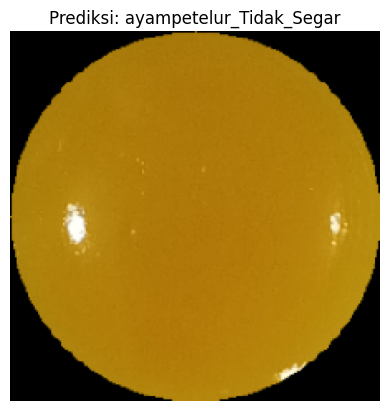

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

--- Hasil Prediksi ---
Gambar: kamera_440_480_lx_13_00_3_telur_puyuh_3 (2).png
Prediksi: puyuh_Segar (Keyakinan: 93.78%)


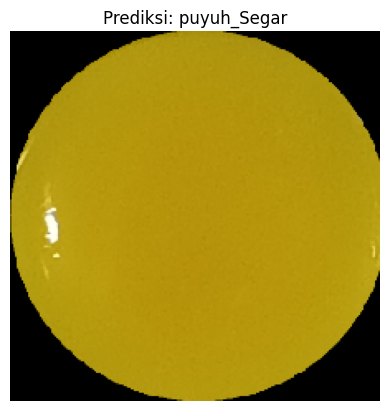

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step

--- Hasil Prediksi ---
Gambar: kamera_440_480_lx_13_00_2_telur_bebek_2 (2).png
Prediksi: bebek_Segar (Keyakinan: 73.62%)


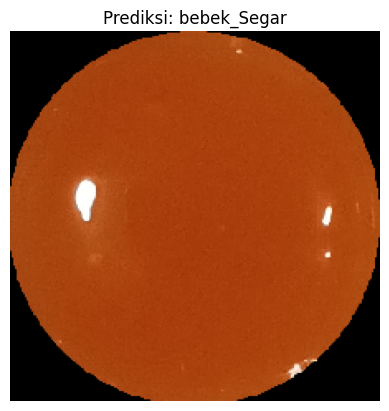

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

--- Hasil Prediksi ---
Gambar: kamera_440_480_lx_15_00_2_telur_bebek_1 (2).png
Prediksi: bebek_Tidak_Segar (Keyakinan: 71.10%)


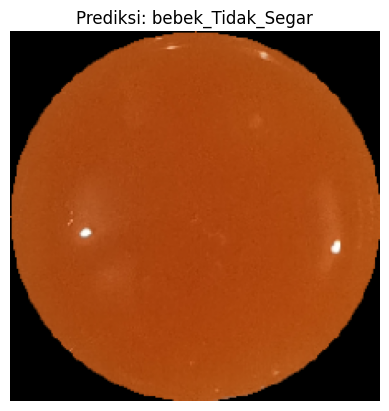

In [ ]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from google.colab import files

# ----- Konfigurasi Model (Harus sama dengan saat training) -----
IMG_SIZE = (224, 224)
# Jumlah kelas sekarang adalah 3 jenis * 3 kondisi = 9
NUM_CLASSES = 9
# Path disesuaikan dengan skrip training Anda (ModelCNN_9)
MODEL_PATH = '/content/drive/MyDrive/Kuning Telur - CV/05 Model/ModelCNN_9/final_type_condition_model.h5'

LABEL_MAP = {
    'ayampetelur_Kurang_Segar': 0,
    'ayampetelur_Segar': 1,
    'ayampetelur_Tidak_Segar': 2,
    'bebek_Kurang_Segar': 3,
    'bebek_Segar': 4,
    'bebek_Tidak_Segar': 5,
    'puyuh_Kurang_Segar': 6,
    'puyuh_Segar': 7,
    'puyuh_Tidak_Segar': 8
}
# Buat inverse map untuk menerjemahkan hasil prediksi (tidak perlu diubah)
inv_label_map = {v: k for k, v in LABEL_MAP.items()}


# ----- Fungsi untuk membangun arsitektur model -----
def get_augmentation():
    """Fungsi ini harus sama persis dengan yang ada di skrip training."""
    return tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.04),
        layers.RandomZoom(0.05),
        layers.RandomTranslation(0.02, 0.02),
        layers.RandomContrast(0.08),
    ], name="augmentation")

def build_model(num_classes):
    """Fungsi ini harus sama persis dengan yang ada di skrip training."""
    base = tf.keras.applications.MobileNetV2(
        input_shape=(*IMG_SIZE, 3),
        include_top=False,
        weights='imagenet'
    )
    base.trainable = False

    inputs = layers.Input(shape=(*IMG_SIZE, 3), dtype=tf.float32)
    x = get_augmentation()(inputs)
    x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
    x = base(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)
    return model


# ----- Membangun ulang model dan memuat bobotnya -----
print("Membangun arsitektur model...")
model = build_model(NUM_CLASSES)
print(f"Memuat bobot dari: {MODEL_PATH}")
# Cek apakah file model ada sebelum mencoba memuat
if os.path.exists(MODEL_PATH):
    model.load_weights(MODEL_PATH)
    print("Model siap digunakan.")
else:
    print(f"ERROR: File model tidak ditemukan di '{MODEL_PATH}'. Pastikan path sudah benar.")
    # Hentikan eksekusi jika model tidak ada
    # raise FileNotFoundError(f"Model file not found at {MODEL_PATH}")

# ----- Fungsi untuk prediksi -----
def predict_image(img_path):
    # ----- Proses gambar -----
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) # Buat menjadi batch berisi 1 gambar

    # ----- 2. HAPUS PREPROCESSING MANUAL -----
    # Baris ini dihapus karena model sudah melakukannya secara internal.
    # img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

    # ----- Prediksi -----
    predictions = model.predict(img_array)
    score = np.max(predictions)
    pred_class_index = np.argmax(predictions, axis=1)[0]

    # ----- Mapping ke label -----
    label_name = inv_label_map[pred_class_index]

    # Tampilkan hasil
    print(f"\n--- Hasil Prediksi ---")
    print(f"Gambar: {os.path.basename(img_path)}")
    print(f"Prediksi: {label_name} (Keyakinan: {score:.2%})")

    plt.imshow(img)
    plt.title(f"Prediksi: {label_name}")
    plt.axis('off')
    plt.show()

# ----- Upload gambar dari komputer -----
print("\nSilakan unggah gambar kuning telur...")
uploaded = files.upload()
for filename in uploaded.keys():
    predict_image(filename)

# Model 4

Membangun arsitektur model multi-output...
Memuat bobot dari: /content/drive/MyDrive/Kuning Telur - CV/05 Model/ModelCNN_Multi/final_type_time_multi.h5
Model siap digunakan.

Silakan unggah gambar kuning telur untuk diuji...


Saving kamera_440_480_lx_14_00_2_telur_bebek_2.png to kamera_440_480_lx_14_00_2_telur_bebek_2 (3).png
Saving kamera_440_480_lx_14_00_1_telur_ayam_petelur_3.png to kamera_440_480_lx_14_00_1_telur_ayam_petelur_3 (3).png
Saving kamera_440_480_lx_15_00_1_telur_ayam_petelur_1.png to kamera_440_480_lx_15_00_1_telur_ayam_petelur_1 (3).png
Saving kamera_440_480_lx_13_00_3_telur_puyuh_3.png to kamera_440_480_lx_13_00_3_telur_puyuh_3 (3).png
Saving kamera_440_480_lx_13_00_2_telur_bebek_2.png to kamera_440_480_lx_13_00_2_telur_bebek_2 (3).png
Saving kamera_440_480_lx_15_00_2_telur_bebek_1.png to kamera_440_480_lx_15_00_2_telur_bebek_1 (3).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step

--- Hasil Prediksi untuk: kamera_440_480_lx_14_00_2_telur_bebek_2 (3).png ---
🥚 Prediksi Jenis: bebek (Keyakinan: 98.97%)
⏱️ Prediksi Waktu: 90 menit (Keyakinan: 75.57%)


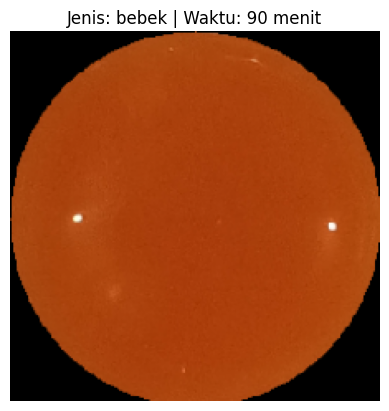

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

--- Hasil Prediksi untuk: kamera_440_480_lx_14_00_1_telur_ayam_petelur_3 (3).png ---
🥚 Prediksi Jenis: ayampetelur (Keyakinan: 80.22%)
⏱️ Prediksi Waktu: 90 menit (Keyakinan: 53.87%)


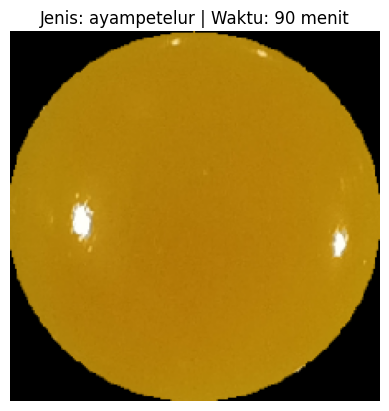

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

--- Hasil Prediksi untuk: kamera_440_480_lx_15_00_1_telur_ayam_petelur_1 (3).png ---
🥚 Prediksi Jenis: ayampetelur (Keyakinan: 73.96%)
⏱️ Prediksi Waktu: 90 menit (Keyakinan: 41.79%)


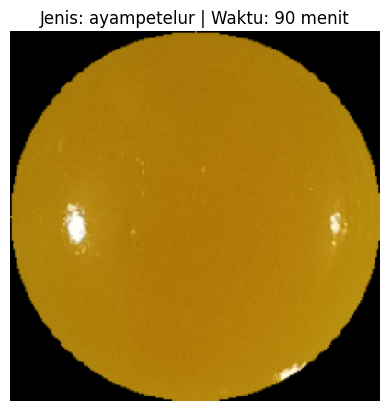

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

--- Hasil Prediksi untuk: kamera_440_480_lx_13_00_3_telur_puyuh_3 (3).png ---
🥚 Prediksi Jenis: puyuh (Keyakinan: 83.00%)
⏱️ Prediksi Waktu: 150 menit (Keyakinan: 42.60%)


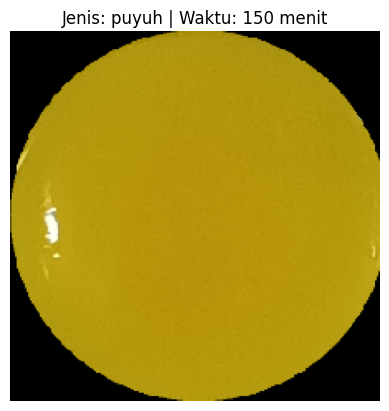

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

--- Hasil Prediksi untuk: kamera_440_480_lx_13_00_2_telur_bebek_2 (3).png ---
🥚 Prediksi Jenis: bebek (Keyakinan: 90.33%)
⏱️ Prediksi Waktu: 60 menit (Keyakinan: 23.11%)


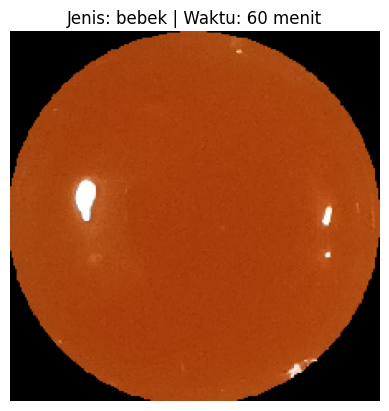

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

--- Hasil Prediksi untuk: kamera_440_480_lx_15_00_2_telur_bebek_1 (3).png ---
🥚 Prediksi Jenis: bebek (Keyakinan: 93.22%)
⏱️ Prediksi Waktu: 90 menit (Keyakinan: 60.83%)


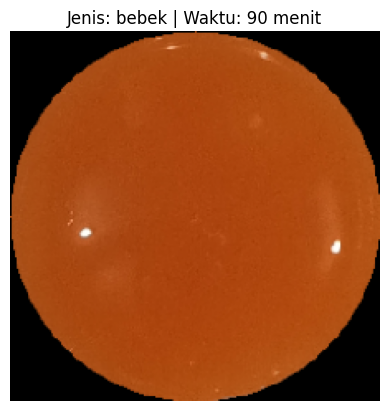

In [ ]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from google.colab import files

# ----- Konfigurasi Model (Harus sama dengan saat training) -----
IMG_SIZE = (224, 224)
# Path disesuaikan dengan skrip training Anda (ModelCNN_Multi)
MODEL_PATH = '/content/drive/MyDrive/Kuning Telur - CV/05 Model/ModelCNN_Multi/final_type_time_multi.h5'

# ----- 1. DEFINISIKAN LABEL MAPS (PENTING!) -----
# Salin `type_map` dan `time_map` yang sama persis dari output skrip training Anda.

# a. Type Map (Jenis Telur)
TYPE_MAP = {
    "ayampetelur": 0,
    "bebek": 1,
    "puyuh": 2
}

# b. Time Map (Waktu dalam menit)
# Urutan di bawah ini hanyalah CONTOH. Pastikan sesuai dengan output training Anda!
TIME_MAP = {
    '00': 0,
    '120': 1,
    '150': 2,
    '30': 3,
    '60': 4,
    '90': 5
}

# Buat inverse maps untuk menerjemahkan hasil prediksi (tidak perlu diubah)
inv_type_map = {v: k for k, v in TYPE_MAP.items()}
inv_time_map = {v: k for k, v in TIME_MAP.items()}


# ----- Fungsi untuk membangun arsitektur model (Harus sama persis dengan training) -----
def get_augmentation():
    """Fungsi ini harus sama persis dengan yang ada di skrip training."""
    return tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.04),
        layers.RandomZoom(0.05),
        layers.RandomTranslation(0.02, 0.02),
        layers.RandomContrast(0.08),
    ], name="augmentation")

def build_model(num_classes_type, num_classes_time):
    """Fungsi ini harus sama persis dengan yang ada di skrip training."""
    base = tf.keras.applications.MobileNetV2(
        input_shape=(*IMG_SIZE, 3),
        include_top=False,
        weights='imagenet'
    )
    base.trainable = False

    inputs = layers.Input(shape=(*IMG_SIZE, 3), dtype=tf.float32)
    x = get_augmentation()(inputs)
    x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
    x = base(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    # Dua kepala output yang terpisah
    out_type = layers.Dense(num_classes_type, activation='softmax', name="out_type")(x)
    out_time = layers.Dense(num_classes_time, activation='softmax', name="out_time")(x)

    model = tf.keras.Model(inputs, [out_type, out_time])
    return model


# ----- Membangun ulang model dan memuat bobotnya -----
print("Membangun arsitektur model multi-output...")
# Tentukan jumlah kelas untuk setiap output
num_types = len(TYPE_MAP)
num_times = len(TIME_MAP)
model = build_model(num_classes_type=num_types, num_classes_time=num_times)

print(f"Memuat bobot dari: {MODEL_PATH}")
if os.path.exists(MODEL_PATH):
    model.load_weights(MODEL_PATH)
    print("Model siap digunakan.")
else:
    print(f"ERROR: File model tidak ditemukan di '{MODEL_PATH}'. Pastikan path sudah benar.")


# ----- Fungsi untuk prediksi -----
def predict_image(img_path):
    """Memproses gambar dan menampilkan dua hasil prediksi dari model."""
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array_batch = np.expand_dims(img_array, axis=0)

    # ----- Prediksi -----
    # Model multi-output akan mengembalikan sebuah LIST berisi hasil prediksi
    predictions = model.predict(img_array_batch)
    pred_type_probs, pred_time_probs = predictions  # Unpack list hasil prediksi

    # --- Proses Prediksi 1: Jenis Telur ---
    score_type = np.max(pred_type_probs)
    pred_class_index_type = np.argmax(pred_type_probs, axis=1)[0]
    label_name_type = inv_type_map.get(pred_class_index_type, "Tipe?")

    # --- Proses Prediksi 2: Waktu ---
    score_time = np.max(pred_time_probs)
    pred_class_index_time = np.argmax(pred_time_probs, axis=1)[0]
    label_name_time = inv_time_map.get(pred_class_index_time, "Waktu?")

    # Tampilkan hasil
    print(f"\n--- Hasil Prediksi untuk: {os.path.basename(img_path)} ---")
    print(f"🥚 Prediksi Jenis: {label_name_type} (Keyakinan: {score_type:.2%})")
    print(f"⏱️ Prediksi Waktu: {label_name_time} menit (Keyakinan: {score_time:.2%})")

    # Tampilkan gambar dengan kedua hasil prediksi
    plt.imshow(img_array / 255.0)
    plt.title(f"Jenis: {label_name_type} | Waktu: {label_name_time} menit")
    plt.axis('off')
    plt.show()

# ----- Upload gambar dari komputer dan jalankan prediksi -----
print("\nSilakan unggah gambar kuning telur untuk diuji...")
try:
    uploaded = files.upload()
    for filename in uploaded.keys():
        predict_image(filename)
except Exception as e:
    print(f"Terjadi error: {e}")